# Data Observations

In [1]:
import tensorflow as tf
import os
import shutil
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt 
import seaborn as sns
import scikitplot as skplt
import sklearn
from Bio.Seq import Seq
import math
np.random.seed(42)

In [2]:
dummy = []
head = []
with open("../Data/cAb-rep/cAb-Rep_heavy.nt.txt") as myfile:
    for i in myfile:
        if i.find(">") == -1 & i.find("-") == -1 & i.find("N") == -1: # These conditions must be met for a valid sequence, the longest was 141. However, there is no 141 sequence for COVID, the greatest is 140, then 138. So, we have to go with 138
            head.append(Seq.translate(i.strip()))
            # if len(aa_sequence) <= 138:
            #     head.append(aa_sequence)
            #     if len(head) >= 11415:
            #         break
healthy_lengths = list(map(lambda x: len(x) ,head))
print(len(healthy_lengths))

/Users/joseph/miniforge3/envs/tfenv/lib/python3.10/site-packages/Bio/Seq.py:3482: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


3279337


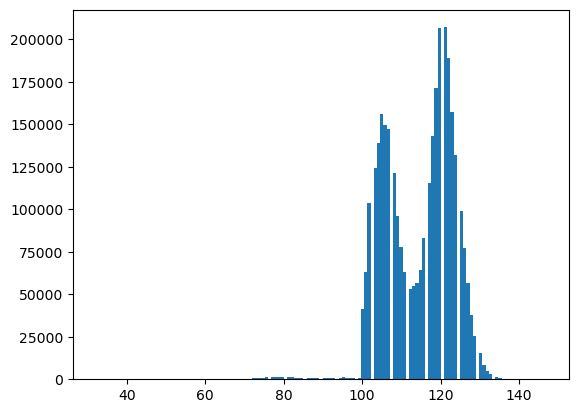

In [3]:
plt.hist(healthy_lengths, bins=141)
# plt.yscale('log')
plt.show()

# Lengths of the different healthy sequences we have 

In [4]:
df = pd.read_csv("../Data/CoV-AbDab_031022.csv")
df = df[["VHorVHH"]]
df = df[(df.VHorVHH != 'ND')]
array = np.squeeze(df.to_numpy())
covid_lengths = list(map(lambda x: len(x), array))

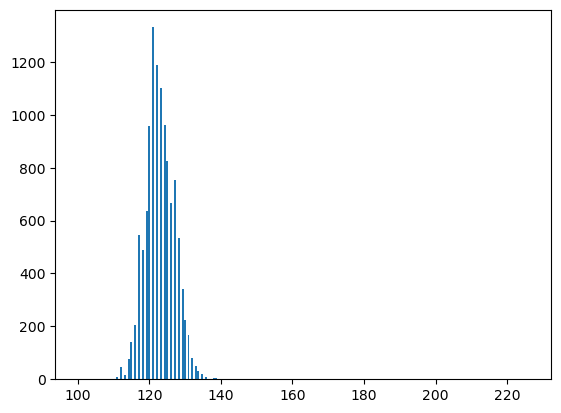

In [5]:
plt.hist(covid_lengths, bins=226)
plt.show()

# Lengths of the different covid sequences we have 

In [6]:
healthy_lengths.sort(reverse=True)
covid_lengths.sort(reverse=True)
print(healthy_lengths[:1000]) # Cut out all data under 100 aa's long. 
print(covid_lengths[:1000]) # the edges are negligible. You can keep all of the data for this set

# print(covid_sequences)

[147, 147, 147, 147, 146, 145, 145, 144, 144, 144, 143, 143, 143, 143, 143, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138,